# Crypto knot
> Name: Abhishek Bajpai

> Role No: 15V070011

> Email: abbajpai@barc.gov.in, abhisheietk@gmail.com

## Pre Formatting
Algorithm works on plain text stream, two characters at a time. For better security it is required to append random characters in the start and end of the stream. Thus while pre-formatting eight random characters are added at the start of the stream and two random characters are added at the end to terminate the stream. Further text is capitalized and only alphabetic characters should be included.  

In [17]:
import re
import gmpy2
import pandas as pd
from random import randrange

message = '''Meet me at IIT'''
print 'message: ', message
password = "mysecret"
print 'key: ', password

def PreFormat(PT):
    PT0 = re.findall('.', PT.upper().replace(" ", ""))
    PT1 = []
    for i in range(8):
        PT1.append(str(unichr(ord('A') + randrange(26))))
    for i in PT0:
        if ord(i) <= ord('Z') and ord(i) >= ord('A'):
            PT1.append(i)
    for i in range(2):
        PT1.append(str(unichr(ord('A') + randrange(26))))    
    return PT1
    
PlainText = PreFormat(message)
print 'message:', PlainText

Key = re.findall('.', password.upper().replace(" ", ""))
print 'Key:', Key


message:  Meet me at IIT
key:  mysecret
message: ['K', 'F', 'R', 'Y', 'B', 'M', 'V', 'N', 'M', 'E', 'E', 'T', 'M', 'E', 'A', 'T', 'I', 'I', 'T', 'W', 'H']
Key: ['M', 'Y', 'S', 'E', 'C', 'R', 'E', 'T']


In [18]:
from ipy_table import make_table, set_row_style, set_cell_style
x = [PlainText]
table = make_table(x, len(PlainText))
set_row_style(0, color='lightGreen')
for i in range(8, len(PlainText)-2):
    set_cell_style(0, i, bold='True')
table

K,F,R,Y,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H


## Building Blocks

Algorithm comprised of two building blocks. 

### Key Mixing

Key is expanded to the size of a plaintext by repeating it self and concatenating extra characters. Then each character is added to the plaintext character for example. Assuming 'A' as an additive identity.

$$A + A = A$$
$$B + A = B$$
$$M + D = P$$
Similarly inverse key mixing is a character substraction.
$$A - A = A$$
$$B - A = B$$
$$P - D = M$$

In [19]:
def keymix(k, p):
    return str(unichr(gmpy2.f_mod(ord(k) + ord(p) - 2 * ord('A'), 
                                  ord('Z') - ord('A')+1) + ord('A')))

def invkey(key):
    return [str(unichr(ord('Z') + ord('A') - ord(i) +1)) for i in key]

### Stransform

Each pair of characters got transformed by tables given below.

While encryption Stable is used to transform pair of characters and while decryption IStable is used for inverse transform to the text.

#### Stable


In [20]:
dsTable[alphabets[:-9]]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
A,BL,NY,QQ,DS,SA,AF,EB,CV,VS,GB,YG,EY,MQ,BM,FV,IP,GS
B,OL,LQ,HR,XF,JA,HN,CO,TY,JS,MI,NV,UM,PT,SU,PD,CD,LO
C,KC,YT,VH,WY,OU,DO,GM,IA,YM,CE,WC,LD,GY,WG,UD,SJ,OA
D,UY,HM,GN,NU,RO,FC,ZI,EX,FF,WN,RM,BD,BZ,FD,KR,GC,FO
E,LV,WK,XU,RK,WX,OI,HS,QL,EV,CB,OW,FU,WP,YO,JY,BW,FZ
F,FT,QW,AB,WE,YJ,SV,ME,AS,IC,IR,CM,NL,DY,RZ,ES,DL,MY
G,QH,ZW,TB,SW,DT,YF,DM,KQ,HC,PO,ED,ND,UC,XL,LA,VF,BC
H,LE,TA,EL,PQ,QZ,RL,HP,NI,JM,SY,DG,LB,NJ,ZS,QE,HT,QI
I,MZ,ZF,FR,RW,BQ,RI,QS,PE,EK,ZY,VQ,UO,FW,TU,NM,TM,UN
J,TQ,XV,LX,XP,MP,NW,JK,DZ,ZE,IZ,HW,SO,EO,FN,VY,AO,QD


In [21]:
dsTable[alphabets[-9:]]

,R,S,T,U,V,W,X,Y,Z
A,PZ,VB,XW,KG,MA,OR,TC,BX,CK
B,VN,QT,MM,MV,AP,DE,JN,HA,OY
C,IG,CH,RT,SM,KO,EF,XR,IE,GV
D,MU,GW,MT,UQ,AU,KY,OP,VP,JI
E,HK,PV,KI,ZO,NP,EU,KX,RD,QU
F,YV,BU,VO,LT,YY,TH,FI,EE,WM
G,IV,GE,DI,VA,JE,YN,DF,FJ,SI
H,UX,YZ,HB,JL,BV,OH,RE,OS,MJ
I,BH,DC,TF,TE,MH,WH,CN,JC,IQ
J,OM,OT,EW,ID,SK,DP,VK,ZA,SG


#### IStable

In [22]:
disTable[alphabets[:-9]]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
A,DP,HU,EW,PM,IU,YQ,ON,YB,HC,EB,UU,OG,VA,HV,QC,PY,FY
B,CF,OL,JE,CK,GA,XV,JA,TH,WO,MR,MY,LH,AV,FM,VX,WW,IW
C,IK,QG,SU,SI,YX,FD,PD,IG,IF,YI,AC,GX,HY,NY,HQ,VO,GW
D,BO,LD,PB,MS,KG,ND,ZP,RZ,UJ,CL,GN,LC,TR,LG,BS,OB,QJ
E,KO,VR,JC,WB,YF,CX,SG,GK,YC,VG,SP,AH,GF,QK,DZ,HI,OH
F,FA,PP,EY,XG,WC,ID,CM,PR,FW,ZQ,CP,OM,XZ,WS,JL,XM,NZ
G,TY,GM,KQ,KH,QN,WQ,NV,BW,RC,LP,UA,VL,ZO,RM,CW,EV,VQ
H,CR,RI,SC,FV,MV,QM,AP,GU,OR,UO,OQ,VW,VI,QT,WH,ZL,AG
I,PU,MZ,UP,TG,DT,XF,QW,IY,JR,ZD,TE,NK,JB,HH,FE,UM,QH
J,NM,ZZ,MM,UK,RX,YG,AU,OP,OY,KR,FX,PW,ZH,MH,IQ,LR,GY


In [23]:
disTable[alphabets[-9:]]

,R,S,T,U,V,W,X,Y,Z
A,ZV,EA,BH,IT,UG,AX,LZ,RV,YJ
B,TO,SL,CG,XL,SA,NO,OV,DV,PN
C,FU,BM,XA,MG,KS,KC,ZU,JO,VT
D,YE,IM,RY,OC,TV,JZ,KL,LU,WZ
E,XH,LW,UI,QU,XY,DF,XR,IO,IJ
F,YY,ST,TI,AR,PG,IP,DB,FG,BI
G,MO,ZJ,WP,KZ,TS,NC,EN,KA,DQ
H,JY,EX,WF,WN,CC,WI,JW,NQ,UX
I,FI,ZG,CY,TK,UY,XW,MQ,EM,GD
J,NP,PC,RS,HM,YW,TX,SK,EF,TT


These tables are based on multiplicative inverse in prime field $P(677)$ which is $26^2 + 1$

Further affine transform is performed in order to uncorrelated identity term 'AA' with 'AA' by adding 37.

* 'AA' maps to $1$ 
* $1^{-1} mod(667)= 1$
* 1 + 37 = 38
* $38$ maps to 'BL'

#### Security
This function is highly non-linear function thus creates good confusion state. It increases the correlation immunity of the cipher and also introduce local avalanche in the algorithm.

### Algorithm
These building blocks are used in a specific order to encrypt a plain text. This order resembles hair knot that is why it is named crypto knot.  

* Encryption starts with the key-mixing of first two characters as Stransform is invertible and doesn't give any extra security.
* Key mixing is used to mix the key
* Stransform is for confusion
* After stransform resultant character pair are updated in place in the plain text. 
* Further in the next cycle 2nd and 3rd characters are chosen and same procedure is performed.
* Because of initial random characters which is of the size of the actual/ required key size, first character get mixed with the complete key. In contrast with no random header first two characters get mixed with only first two characters of the key thus only posses security of 2 chars.
* This special knot formation and non linear Stransform ensures maximum avalanche with reduced rounds as compared with the first design.
* Design is simple with a catch that decryption mechanism works on the encrypted stream in reverse order. Thus for decryption party should posses whole encrypted stream. Thus online decryption is not possible. But as per problem statement this toy cipher gives good security for offline messages while maintaining design simple and hand calculable.
* Intermediate calculations must be destroyed otherwise adversary may use them as side-channle information and attack the cipher.
* Further Initial random characters while acting as a nonce also make algorithm CPA-secure


### Encryption

In [24]:
def encrypt(key, plaintext):
    intermediates = []
    ciphertext = plaintext[:]
    intermediates.append(['PlainText'] + ciphertext[:])
    
    for i in range(len(ciphertext)-1):
        KM = [keymix(key[(i*2)%len(key)], ciphertext[i]), keymix(key[(i*2+1)%len(key)], ciphertext[i+1])]
        intermediates.append(['Key'] + ['' for j in range(i)] +[key[(i*2)%len(key)], key[(i*2+1)%len(key)]] + ['' for j in range(len(ciphertext)-i-2)])
        intermediates.append(['KeyMixing'] + ['' for j in range(i)] + KM + ['' for j in range(len(ciphertext)-i-2)])
        ST = sTable[KM[0]+ KM[1]]
        ciphertext[i], ciphertext[i+1] = [ST[0], ST[1]]
        intermediates.append(['Substitution'] + ciphertext[:])
    intermediates.append(['CipherText'] + ciphertext[:])
        
    table = make_table(intermediates, len(plaintext))
    return ciphertext, intermediates

def encrypt1(key, plaintext):
    intermediates = []
    ciphertext = plaintext[:]
    #intermediates.append(['PlainText'] + ciphertext[:])
    
    for i in range(len(ciphertext)-1):
        KM = [keymix(key[(i*2)%len(key)], ciphertext[i]), keymix(key[(i*2+1)%len(key)], ciphertext[i+1])]
        #intermediates.append(['Key'] + ['' for j in range(i)] +[key[(i*2)%len(key)], key[(i*2+1)%len(key)]] + ['' for j in range(len(ciphertext)-i-2)])
        #intermediates.append(['KeyMixing'] + ['' for j in range(i)] + KM + ['' for j in range(len(ciphertext)-i-2)])
        ST = sTable[KM[0]+ KM[1]]
        ciphertext[i], ciphertext[i+1] = [ST[0], ST[1]]
        #intermediates.append(['Substitution'] + ciphertext[:])
    #intermediates.append(['CipherText'] + ciphertext[:])
        
    #table = make_table(intermediates, len(plaintext))
    return ciphertext #, intermediates

CipherText, intermediates = encrypt(Key, PlainText)

itable = intermediates[:7]
table = make_table(itable, len(PlainText)+1)
set_row_style(0, color='lightGreen')
#set_row_style(len(itable)-1, color='lightGreen')
for i in range(9, len(PlainText)-1):
    set_cell_style(0, i, bold='True')
for i in range(1, len(itable)/3+1):
    set_cell_style(i*3-2, i, color='lightBlue')
    set_cell_style(i*3-2, i+1, color='lightBlue')
    set_cell_style(i*3-1, i, color='Red')
    set_cell_style(i*3-1, i+1, color='Red')
    set_cell_style(i*3, i, color='Yellow')
    set_cell_style(i*3, i+1, color='Yellow')
table

PlainText,K,F,R,Y,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
Key,M,Y,,,,,,,,,,,,,,,,,,,
KeyMixing,W,D,,,,,,,,,,,,,,,,,,,
Substitution,K,Y,R,Y,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
Key,,S,E,,,,,,,,,,,,,,,,,,
KeyMixing,,Q,V,,,,,,,,,,,,,,,,,,
Substitution,K,A,T,Y,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H


In [25]:
itable = intermediates[6:43]
table = make_table(itable, len(PlainText)+1)
#set_row_style(0, color='lightGreen')
#set_row_style(len(itable)-1, color='lightGreen')
#for i in range(9, len(PlainText)-1):
#    set_cell_style(0, i, bold='True')
for i in range(1, len(itable)/3):
    set_cell_style(i*3-2, i+3, color='lightBlue')
    set_cell_style(i*3-2, i+4, color='lightBlue')
    set_cell_style(i*3-1, i+3, color='Red')
    set_cell_style(i*3-1, i+4, color='Red')
    set_cell_style(i*3, i+3, color='Yellow')
    set_cell_style(i*3, i+4, color='Yellow')
table

Substitution,K,A,T,Y,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
Key,,,C,R,,,,,,,,,,,,,,,,,
KeyMixing,,,V,P,,,,,,,,,,,,,,,,,
Substitution,K,A,N,K,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
Key,,,,E,T,,,,,,,,,,,,,,,,
KeyMixing,,,,O,U,,,,,,,,,,,,,,,,
Substitution,K,A,N,P,K,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
Key,,,,,M,Y,,,,,,,,,,,,,,,
KeyMixing,,,,,W,K,,,,,,,,,,,,,,,
Substitution,K,A,N,P,C,U,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
Key,,,,,,S,E,,,,,,,,,,,,,,


In [26]:
itable = intermediates[42:]
table = make_table(itable, len(PlainText)+1)
#set_row_style(0, color='lightGreen')
#set_row_style(len(itable)-1, color='lightGreen')
#for i in range(9, len(PlainText)-1):
#    set_cell_style(0, i, bold='True')
for i in range(1, len(itable)/3):
    set_cell_style(i*3-2, i+15, color='lightBlue')
    set_cell_style(i*3-2, i+16, color='lightBlue')
    set_cell_style(i*3-1, i+15, color='Red')
    set_cell_style(i*3-1, i+16, color='Red')
    set_cell_style(i*3, i+15, color='Yellow')
    set_cell_style(i*3, i+16, color='Yellow')
table

Substitution,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,P,T,I,I,T,W,H
Key,,,,,,,,,,,,,,,C,R,,,,,
KeyMixing,,,,,,,,,,,,,,,R,K,,,,,
Substitution,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,Q,I,I,T,W,H
Key,,,,,,,,,,,,,,,,E,T,,,,
KeyMixing,,,,,,,,,,,,,,,,U,B,,,,
Substitution,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,V,I,T,W,H
Key,,,,,,,,,,,,,,,,,M,Y,,,
KeyMixing,,,,,,,,,,,,,,,,,H,G,,,
Substitution,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,K,Q,T,W,H
Key,,,,,,,,,,,,,,,,,,S,E,,


### Decryption

In [27]:
def decrypt(key, ciphertext):
    ikey = invkey(key[:])
    intermediates = []
    plaintext = ciphertext[:]
    intermediates.append(['CipherText'] + plaintext[:])
    
    for i in reversed(range(len(plaintext)-1)):
        ST = isTable[plaintext[i]+ plaintext[i+1]]
        intermediates.append(['InvSubstitution'] + ['' for j in range(i)] +[ST[0], ST[1]] + ['' for j in range(len(ciphertext)-i-2)])
        KM = [keymix(ikey[(i*2)%len(ikey)], ST[0]), keymix(ikey[(i*2+1)%len(ikey)], ST[1])]
        plaintext[i], plaintext[i+1] = [KM[0], KM[1]]
        intermediates.append(['Key'] + ['' for j in range(i)] +[key[(i*2)%len(key)], key[(i*2+1)%len(key)]] + ['' for j in range(len(ciphertext)-i-2)])
        intermediates.append(['InvKeyMixing'] + plaintext[:])
    intermediates.append(['PlainText'] + plaintext[:])
        
    table = make_table(intermediates, len(plaintext))
    return plaintext, intermediates

def decrypt1(key, ciphertext):
    ikey = invkey(key[:])
    #intermediates = []
    plaintext = ciphertext[:]
    #intermediates.append(['CipherText'] + plaintext[:])
    
    for i in reversed(range(len(plaintext)-1)):
        ST = isTable[plaintext[i]+ plaintext[i+1]]
        #intermediates.append(['InvSubstitution'] + ['' for j in range(i)] +[ST[0], ST[1]] + ['' for j in range(len(ciphertext)-i-2)])
        KM = [keymix(ikey[(i*2)%len(ikey)], ST[0]), keymix(ikey[(i*2+1)%len(ikey)], ST[1])]
        plaintext[i], plaintext[i+1] = [KM[0], KM[1]]
        #intermediates.append(['Key'] + ['' for j in range(i)] +[key[(i*2)%len(key)], key[(i*2+1)%len(key)]] + ['' for j in range(len(ciphertext)-i-2)])
        #intermediates.append(['InvKeyMixing'] + plaintext[:])
    #intermediates.append(['PlainText'] + plaintext[:])
        
    #table = make_table(intermediates, len(plaintext))
    return plaintext #, intermediates

PlainText0, intermediates = decrypt(Key, CipherText)

itable = intermediates[:10]
table = make_table(itable, len(PlainText)+1)
set_row_style(0, color='lightGreen')
#set_row_style(len(itable)-1, color='lightGreen')
#for i in range(9, len(PlainText)-1):
#    set_cell_style(len(itable)-1, i, bold='True')
for i in range(1, len(itable)/3):
    set_cell_style((len(itable)-i*3)-1, i, color='lightBlue')
    set_cell_style((len(itable)-i*3)-1, i+1, color='lightBlue')
    set_cell_style((len(itable)-i*3), i, color='Red')
    set_cell_style((len(itable)-i*3), i+1, color='Red')
    set_cell_style((len(itable)-i*3) -2, i, color='Yellow')
    set_cell_style((len(itable)-i*3) -2, i+1, color='Yellow')
table

CipherText,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,K,U,K,O,R
InvSubstitution,,,,,,,,,,,,,,,,,,,,W,A
Key,,,,,,,,,,,,,,,,,,,,E,T
InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,K,U,K,S,H
InvSubstitution,,,,,,,,,,,,,,,,,,,R,N,
Key,,,,,,,,,,,,,,,,,,,C,R,
InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,K,U,P,W,H
InvSubstitution,,,,,,,,,,,,,,,,,,I,X,,
Key,,,,,,,,,,,,,,,,,,S,E,,
InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,K,Q,T,W,H


In [28]:
itable = intermediates[9:46]
table = make_table(itable, len(PlainText)+1)
set_row_style(0, color='lightGreen')
#set_row_style(len(itable)-1, color='lightGreen')
#for i in range(9, len(PlainText)-1):
#    set_cell_style(len(itable)-1, i, bold='True')
for i in range(1, len(itable)/3):
    set_cell_style((len(itable)-i*3)-1, i, color='lightBlue')
    set_cell_style((len(itable)-i*3)-1, i+1, color='lightBlue')
    set_cell_style((len(itable)-i*3), i, color='Red')
    set_cell_style((len(itable)-i*3), i+1, color='Red')
    set_cell_style((len(itable)-i*3) -2, i, color='Yellow')
    set_cell_style((len(itable)-i*3) -2, i+1, color='Yellow')
table

InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,K,Q,T,W,H
InvSubstitution,,,,,,,,,,,,,,,,,H,G,,,
Key,,,,,,,,,,,,,,,,,M,Y,,,
InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,M,V,I,T,W,H
InvSubstitution,,,,,,,,,,,,,,,,U,B,,,,
Key,,,,,,,,,,,,,,,,E,T,,,,
InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,G,Q,I,I,T,W,H
InvSubstitution,,,,,,,,,,,,,,,R,K,,,,,
Key,,,,,,,,,,,,,,,C,R,,,,,
InvKeyMixing,K,A,N,P,C,B,O,F,D,Q,D,R,L,N,P,T,I,I,T,W,H
InvSubstitution,,,,,,,,,,,,,,V,E,,,,,,


In [29]:
itable = intermediates[45:]
table = make_table(itable, len(PlainText)+1)
set_row_style(0, color='lightGreen')
#set_row_style(len(itable)-1, color='lightGreen')
for i in range(9, len(PlainText)-1):
    set_cell_style(len(itable)-1, i, bold='True')
for i in range(1, len(itable)/3):
    set_cell_style((len(itable)-i*3)-1, i, color='lightBlue')
    set_cell_style((len(itable)-i*3)-1, i+1, color='lightBlue')
    set_cell_style((len(itable)-i*3), i, color='Red')
    set_cell_style((len(itable)-i*3), i+1, color='Red')
    set_cell_style((len(itable)-i*3) -2, i, color='Yellow')
    set_cell_style((len(itable)-i*3) -2, i+1, color='Yellow')
table

InvKeyMixing,K,A,N,P,C,U,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
InvSubstitution,,,,,W,K,,,,,,,,,,,,,,,
Key,,,,,M,Y,,,,,,,,,,,,,,,
InvKeyMixing,K,A,N,P,K,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
InvSubstitution,,,,O,U,,,,,,,,,,,,,,,,
Key,,,,E,T,,,,,,,,,,,,,,,,
InvKeyMixing,K,A,N,K,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
InvSubstitution,,,V,P,,,,,,,,,,,,,,,,,
Key,,,C,R,,,,,,,,,,,,,,,,,
InvKeyMixing,K,A,T,Y,B,M,V,N,M,E,E,T,M,E,A,T,I,I,T,W,H
InvSubstitution,,Q,V,,,,,,,,,,,,,,,,,,


In [30]:
import gmpy2
import re

def findDuplicates(l):
    return list(set([x for x in l if l.count(x) > 1]))

alphabets = [str(unichr(i)) for i in range(ord('A'), ord('Z')+1)]

table = []
for i in alphabets:
    for j in alphabets:
        table.append(i + j)

P = gmpy2.next_prime(len(table))

sbox = []

affine = 37
for i in range(1,P):
    tmp = gmpy2.f_mod(gmpy2.invert(i, P) + affine, P)
    if tmp:
        sbox.append(tmp)
    else:
        sbox.append(affine)

tmp = {}
for i, j in zip(sbox, range(1, len(sbox)+1)):
    tmp[i] = j
    
isbox = []
for i in range(1, len(sbox)+1):
    isbox.append(tmp[i])
    
del(tmp)

sTable = {j: table[i-1] for i, j in zip(sbox, table)}
isTable = {j: table[i-1] for i, j in zip(isbox, table)}

def stransform(PT):
    text = [sTable[PT[2 * i] + PT[2 * i + 1]] for i in range(len(PT)/2)]
    text = [re.findall('.', i) for i in text]
    return [item for sublist in text for item in sublist]

def istransform(PT):
    text = [isTable[PT[2 * i] + PT[2 * i + 1]] for i in range(len(PT)/2)]
    text = [re.findall('.', i) for i in text]
    return [item for sublist in text for item in sublist]

In [31]:
import pandas as pd

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)

def _repr_latex_(self):
    return "\\begin{center} {%s}\\end{center}" % self.to_latex()
    return self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_ 

def printtable(table):
    alphadict = {}
    for i in alphabets:
        alphavals = []
        for j in alphabets:
            alphavals.append(table[i + j])
        alphadict[i] = alphavals
    return alphadict

dsTable = pd.DataFrame(printtable(sTable), index=alphabets)
disTable = pd.DataFrame(printtable(isTable), index=alphabets)

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def drawFrequency(PlainText, label):
    alphabet = []
    for i in range(26):
        alphabet.append(str(unichr(65+i)))

    frequency = np.zeros(len(alphabet),dtype=np.float64)

    for i in PlainText:
        frequency[alphabet.index(i)] += 1

    for i in range(len(frequency)):
        frequency[i] = frequency[i]*100/len(PlainText)

    #print    frequency 
    plt.figure(figsize=(15, 5))
    index = [i for i in range(26)] #alphabet]
    value = frequency
    bar_width = 1
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    plt.bar(index, 
             value, 
             #bar_width,
             alpha=opacity,
             color='b',
             ##yerr=std_men,
             #error_kw=error_config,
             label=label)
    plt.xlabel('Alphabets')
    plt.ylabel('Frequency in %')
    plt.title('Frequency Distribution of Latters')
    plt.xticks(index, alphabet)
    plt.legend()

    plt.tight_layout()
    plt.show()
    

In [140]:
import numpy as np
import matplotlib.pyplot as plt

def drawDFrequency(PlainText, label):
    alphabet = []
    for j in range(1 + ord('Z') - ord('A')):
        for i in range(1 + ord('Z') - ord('A')):
            alphabet.append(str(unichr(ord('A') + j)) + str(unichr(ord('A') + i)))

    frequency = np.zeros(len(alphabet),dtype=np.float64)


    for i,j in zip(PlainText[:-1], PlainText[1:]):
        frequency[alphabet.index(i+j)] += 1

    for i in range(len(frequency)):
        frequency[i] = frequency[i]*100/len(PlainText)
        
    #print    frequency 
    plt.figure(figsize=(5, 40))
    index = [i for i in enumrate(frequency)]
    value = frequency
    bar_width = 1
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    plt.barh(index, 
             value, 
             #bar_width,
             alpha=opacity,
             color='b',
             ##yerr=std_men,
             #error_kw=error_config,
             label=label)
    plt.ylabel('Alphabets')
    plt.xlabel('Frequency in %')
    plt.title('Frequency Distribution of Latters')
    plt.yticks(index, [i for i in frequency])
    plt.legend()

    plt.tight_layout()
    plt.show()

In [141]:
with open('ALICES_ADVENTURES_IN_WONDERLAND.txt', 'r') as myfile:
    data=myfile.read().replace('\n', '')
print data[:100]

PlainText = PreFormat(data)
print 'PlainText:', PlainText[:100]


password = "mysecret"
Key = re.findall('.', password.upper().replace(" ", ""))
print 'Key:', Key


Project Gutenberg's Alice's Adventures in Wonderland, by Lewis CarrollThis eBook is for the use of a
PlainText: ['T', 'B', 'D', 'O', 'H', 'P', 'S', 'Y', 'P', 'R', 'O', 'J', 'E', 'C', 'T', 'G', 'U', 'T', 'E', 'N', 'B', 'E', 'R', 'G', 'S', 'A', 'L', 'I', 'C', 'E', 'S', 'A', 'D', 'V', 'E', 'N', 'T', 'U', 'R', 'E', 'S', 'I', 'N', 'W', 'O', 'N', 'D', 'E', 'R', 'L', 'A', 'N', 'D', 'B', 'Y', 'L', 'E', 'W', 'I', 'S', 'C', 'A', 'R', 'R', 'O', 'L', 'L', 'T', 'H', 'I', 'S', 'E', 'B', 'O', 'O', 'K', 'I', 'S', 'F', 'O', 'R', 'T', 'H', 'E', 'U', 'S', 'E', 'O', 'F', 'A', 'N', 'Y', 'O', 'N', 'E', 'A', 'N', 'Y', 'W', 'H']
Key: ['M', 'Y', 'S', 'E', 'C', 'R', 'E', 'T']


Populating the interactive namespace from numpy and matplotlib


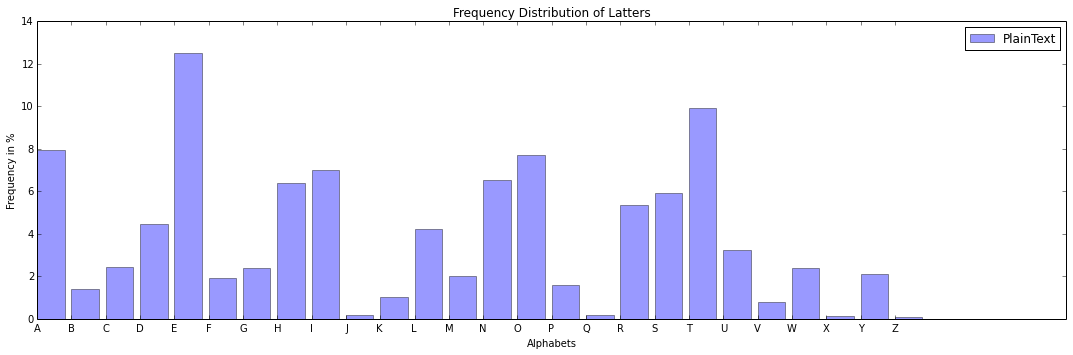

In [142]:
%pylab inline
drawFrequency(PlainText, 'PlainText')

In [143]:
CipherText = encrypt1(Key, PlainText)

Populating the interactive namespace from numpy and matplotlib


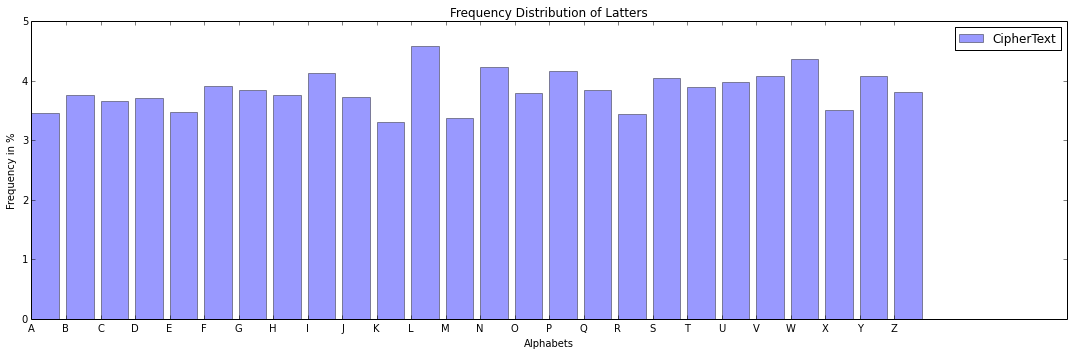

In [144]:
%pylab inline
drawFrequency(CipherText, 'CipherText')

In [145]:
PlainText0 = decrypt1(Key, CipherText)

Populating the interactive namespace from numpy and matplotlib


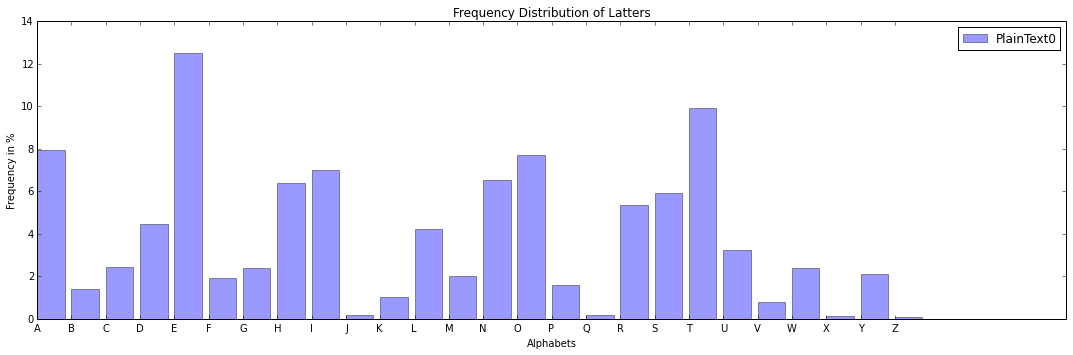

In [146]:
%pylab inline
drawFrequency(PlainText0, 'PlainText0')

In [147]:
print PlainText0[:100]

['T', 'B', 'D', 'O', 'H', 'P', 'S', 'Y', 'P', 'R', 'O', 'J', 'E', 'C', 'T', 'G', 'U', 'T', 'E', 'N', 'B', 'E', 'R', 'G', 'S', 'A', 'L', 'I', 'C', 'E', 'S', 'A', 'D', 'V', 'E', 'N', 'T', 'U', 'R', 'E', 'S', 'I', 'N', 'W', 'O', 'N', 'D', 'E', 'R', 'L', 'A', 'N', 'D', 'B', 'Y', 'L', 'E', 'W', 'I', 'S', 'C', 'A', 'R', 'R', 'O', 'L', 'L', 'T', 'H', 'I', 'S', 'E', 'B', 'O', 'O', 'K', 'I', 'S', 'F', 'O', 'R', 'T', 'H', 'E', 'U', 'S', 'E', 'O', 'F', 'A', 'N', 'Y', 'O', 'N', 'E', 'A', 'N', 'Y', 'W', 'H']


In [148]:
print PlainText[:100]

['T', 'B', 'D', 'O', 'H', 'P', 'S', 'Y', 'P', 'R', 'O', 'J', 'E', 'C', 'T', 'G', 'U', 'T', 'E', 'N', 'B', 'E', 'R', 'G', 'S', 'A', 'L', 'I', 'C', 'E', 'S', 'A', 'D', 'V', 'E', 'N', 'T', 'U', 'R', 'E', 'S', 'I', 'N', 'W', 'O', 'N', 'D', 'E', 'R', 'L', 'A', 'N', 'D', 'B', 'Y', 'L', 'E', 'W', 'I', 'S', 'C', 'A', 'R', 'R', 'O', 'L', 'L', 'T', 'H', 'I', 'S', 'E', 'B', 'O', 'O', 'K', 'I', 'S', 'F', 'O', 'R', 'T', 'H', 'E', 'U', 'S', 'E', 'O', 'F', 'A', 'N', 'Y', 'O', 'N', 'E', 'A', 'N', 'Y', 'W', 'H']


In [149]:
%pylab inline
drawDFrequency(PlainText, 'PlainText')
drawDFrequency(CipherText, 'CipherText')

Populating the interactive namespace from numpy and matplotlib


NameError: global name 'enumrate' is not defined

In [150]:
frequency = {}
for i,j in zip(PlainText[:-1], PlainText[1:]):
    try:
        frequency[i+j] = frequency[i+j] + 1
    except KeyError:
        frequency[i+j] = 1

In [66]:
print frequency

{'WN': 152, 'GW': 54, 'GV': 16, 'GU': 160, 'GT': 276, 'GS': 159, 'GR': 268, 'GQ': 6, 'GP': 28, 'GZ': 1, 'GY': 19, 'GG': 23, 'GF': 33, 'GE': 332, 'GD': 35, 'GC': 20, 'GB': 39, 'GA': 409, 'GO': 314, 'GN': 30, 'GM': 27, 'GL': 106, 'GK': 1, 'GJ': 4, 'GI': 190, 'GH': 393, 'JO': 17, 'VO': 71, 'WZ': 1, 'ZL': 14, 'ZI': 11, 'ZE': 32, 'ZA': 7, 'ZY': 2, 'ZZ': 14, 'ME': 673, 'MD': 11, 'MG': 8, 'MF': 21, 'MA': 465, 'MC': 11, 'MB': 78, 'MM': 25, 'ML': 11, 'MO': 360, 'MN': 32, 'MI': 237, 'MH': 16, 'MK': 1, 'MU': 140, 'MT': 66, 'MW': 32, 'MV': 2, 'MQ': 2, 'MP': 111, 'MS': 84, 'MR': 5, 'MY': 76, 'FP': 27, 'FQ': 2, 'FR': 126, 'FS': 54, 'FT': 371, 'FU': 139, 'FV': 9, 'FW': 37, 'FY': 63, 'FA': 217, 'FB': 24, 'FC': 48, 'FD': 11, 'FE': 198, 'FF': 147, 'FG': 12, 'FH': 65, 'FI': 276, 'FJ': 1, 'FK': 3, 'FL': 56, 'FM': 27, 'FN': 16, 'FO': 454, 'SY': 53, 'SS': 503, 'SR': 39, 'SQ': 23, 'SP': 154, 'SW': 209, 'SV': 36, 'SU': 195, 'ST': 1085, 'SK': 52, 'SJ': 9, 'SI': 522, 'SH': 987, 'SO': 617, 'SN': 144, 'SM': 94, '

In [67]:
frequency = {}
for i in PlainText:
    try:
        frequency[i] = frequency[i] + 1
    except KeyError:
        frequency[i] = 1

for i in frequency:
    frequency[i] = (100.0 * frequency[i])/len(PlainText)

In [68]:
print frequency

{'A': 7.9691704810608215, 'C': 2.4398572346116634, 'B': 1.4203367507052902, 'E': 12.51636192164164, 'D': 4.4463776128261205, 'G': 2.392702379694144, 'F': 1.937414125318092, 'I': 7.018756250050814, 'H': 6.414686298262588, 'K': 1.049602029284791, 'J': 0.19105846388995032, 'M': 2.0057073634745, 'L': 4.236619809917154, 'O': 7.705753705314677, 'N': 6.545581671395702, 'Q': 0.17967625753054903, 'P': 1.6000130082358393, 'S': 5.9098041447491445, 'R': 5.374027431117326, 'U': 3.2341726355498825, 'T': 9.918779827478271, 'W': 2.400019512353759, 'V': 0.7829331945788177, 'Y': 2.1016431027894535, 'X': 0.14309059423247344, 'Z': 0.06585419393653608}


In [138]:
alphabet = []
for j in range(1 + ord('Z') - ord('A')):
    for i in range(1 + ord('Z') - ord('A')):
        alphabet.append(str(unichr(ord('A') + j)) + str(unichr(ord('A') + i)))

frequency = np.zeros(len(alphabet),dtype=np.float64)


for i,j in zip(PlainText[:-1], PlainText[1:]):
    frequency[alphabet.index(i+j)] += 1
        
for i in range(len(frequency)):
    frequency[i] = frequency[i]*100/len(PlainText)
    
print frequency


[  8.94316214e-03   2.25205083e-01   2.13009862e-01   4.18702591e-01
   1.62602948e-03   8.86186067e-02   2.11383832e-01   3.90247075e-02
   6.22769291e-01   1.21952211e-02   1.11383019e-01   9.24397759e-01
   2.00001626e-01   1.46505256e+00   4.87808844e-03   1.49594712e-01
   2.43904422e-03   7.12200912e-01   8.18705843e-01   1.14147269e+00
   6.91062529e-02   1.69107066e-01   1.04065887e-01   9.75617688e-03
   2.41465378e-01   4.06507370e-03   6.91062529e-02   5.36589728e-02
   0.00000000e+00   8.13014740e-04   5.28459581e-01   0.00000000e+00
   0.00000000e+00   8.13014740e-04   9.75617688e-02   6.50411792e-03
   0.00000000e+00   1.04878901e-01   8.13014740e-04   1.62602948e-03
   1.87806405e-01   2.43904422e-03   0.00000000e+00   5.04069139e-02
   2.76425012e-02   1.13822064e-02   1.96749567e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.88624298e-02   0.00000000e+00
   2.95124351e-01   1.62602948e-03   2.92685306e-02   6.50411792e-03
   6.48785762e-01   0.00000000e+00

In [136]:
alphabet = []
for j in range(1 + ord('Z') - ord('A')):
    for i in range(1 + ord('Z') - ord('A')):
        #print str(unichr(ord('A') + j)) + str(unichr(ord('A') + i))
        alphabet.append(str(unichr(ord('A') + j)) + str(unichr(ord('A') + i)))

In [137]:
print alphabet

['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM', 'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT', 'DU', 'DV', 'DW', 'DX', 'DY', 'DZ', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'EO', 'EP', 'EQ', 'ER', 'ES', 'ET', 'EU', 'EV', 'EW', 'EX', 'EY', 'EZ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FM', 'FN', 'FO', 'FP', 'FQ', 'FR', 'FS', 'FT', 'FU', 'FV', 'FW', 'FX', 'FY', 'FZ', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'GK